In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import plotly.express as px

# Load Fear/Greed Index data
fear_greed = pd.read_csv('data/fear_greed_index.csv')

# Load trader data (sample provided, adjust for full dataset)
trader_data = pd.read_csv('data/trader_data.csv')

# Display basic info
print("Fear/Greed Index Data:")
print(fear_greed.info())
print("\nFirst 5 rows:")
print(fear_greed.head())

print("\nTrader Data:")
print(trader_data.info())
print("\nFirst 5 rows:")
print(trader_data.head())

Fear/Greed Index Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

First 5 rows:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Trader Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           2112

In [51]:
# Convert timestamp to datetime and extract date
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

# Check for missing values
print("Missing values in Fear/Greed data:")
print(fear_greed.isnull().sum())

# Drop unnecessary columns if any
fear_greed = fear_greed[['date', 'value', 'classification']]

# Verify classifications
print("\nUnique classifications:")
print(fear_greed['classification'].unique())

Missing values in Fear/Greed data:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Unique classifications:
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


In [52]:
# Convert timestamp to datetime with dayfirst and mixed format
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], dayfirst=True, format='mixed')

# Extract date from timestamp
trader_data['trade_date'] = trader_data['Timestamp IST'].dt.date
trader_data['trade_date'] = pd.to_datetime(trader_data['trade_date'])

# Check for missing values
print("\nMissing values in Trader data:")
print(trader_data.isnull().sum())

# Handle missing values if any
# trader_data = trader_data.dropna()  # Or impute as needed

# Convert relevant columns to appropriate types
trader_data['Closed PnL'] = pd.to_numeric(trader_data['Closed PnL'], errors='coerce')
trader_data['Size USD'] = pd.to_numeric(trader_data['Size USD'], errors='coerce')

# Verify Side values
print("\nUnique trade sides:")
print(trader_data['Side'].unique())


Missing values in Trader data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
trade_date          0
dtype: int64

Unique trade sides:
['BUY' 'SELL']


In [53]:
# Merge trader data with fear/greed index on date
merged_data = pd.merge(
    trader_data,
    fear_greed,
    left_on='trade_date',
    right_on='date',
    how='left'
)

print("\nMerged data shape:", merged_data.shape)
print(merged_data.head())


Merged data shape: (211224, 20)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction

In [54]:
# Group by sentiment classification
sentiment_groups = merged_data.groupby('classification')

# Basic statistics for Closed PnL
print(sentiment_groups['Closed PnL'].describe())

# Average PnL by sentiment
print("\nAverage PnL by sentiment:")
print(sentiment_groups['Closed PnL'].mean().sort_values(ascending=False))

                  count       mean          std           min  25%  50%  \
classification                                                            
Extreme Fear    21400.0  34.537862  1136.056091  -31036.69194  0.0  0.0   
Extreme Greed   39992.0  67.892861   766.828294  -10259.46800  0.0  0.0   
Fear            61837.0  54.290400   935.355438  -35681.74723  0.0  0.0   
Greed           50303.0  42.743559  1116.028390 -117990.10410  0.0  0.0   
Neutral         37686.0  34.307718   517.122220  -24500.00000  0.0  0.0   

                      75%           max  
classification                           
Extreme Fear     5.635032  115287.00000  
Extreme Greed   10.028709   44223.45187  
Fear             5.590856  135329.09010  
Greed            4.944105   74530.52371  
Neutral          3.995795   48504.09555  

Average PnL by sentiment:
classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Nam

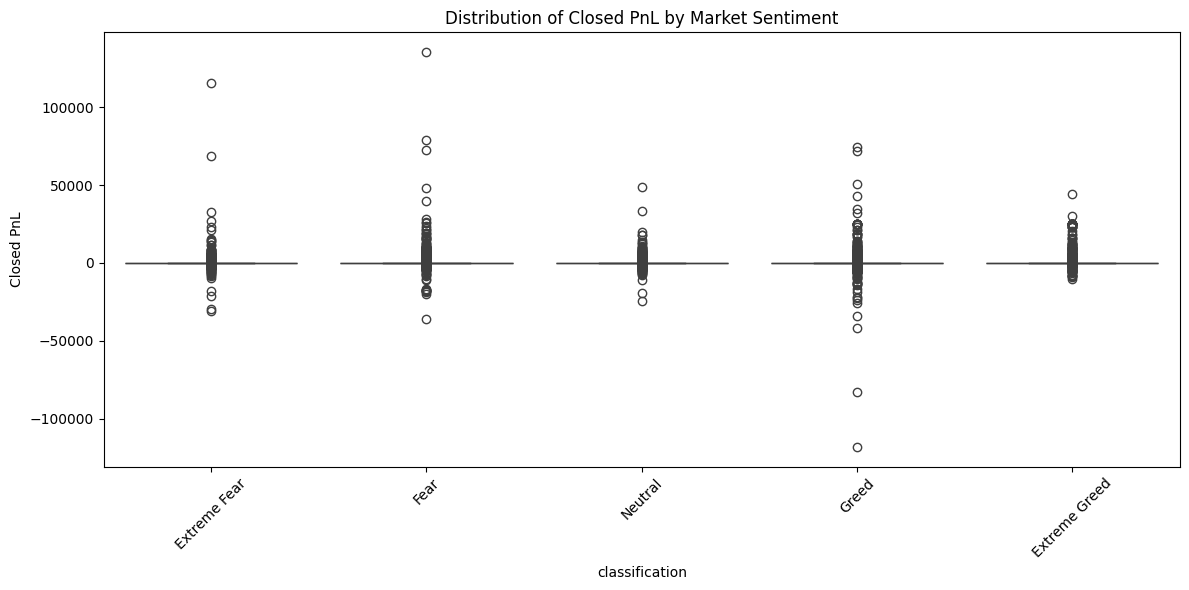

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='classification',
    y='Closed PnL',
    data=merged_data,
    order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
)
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

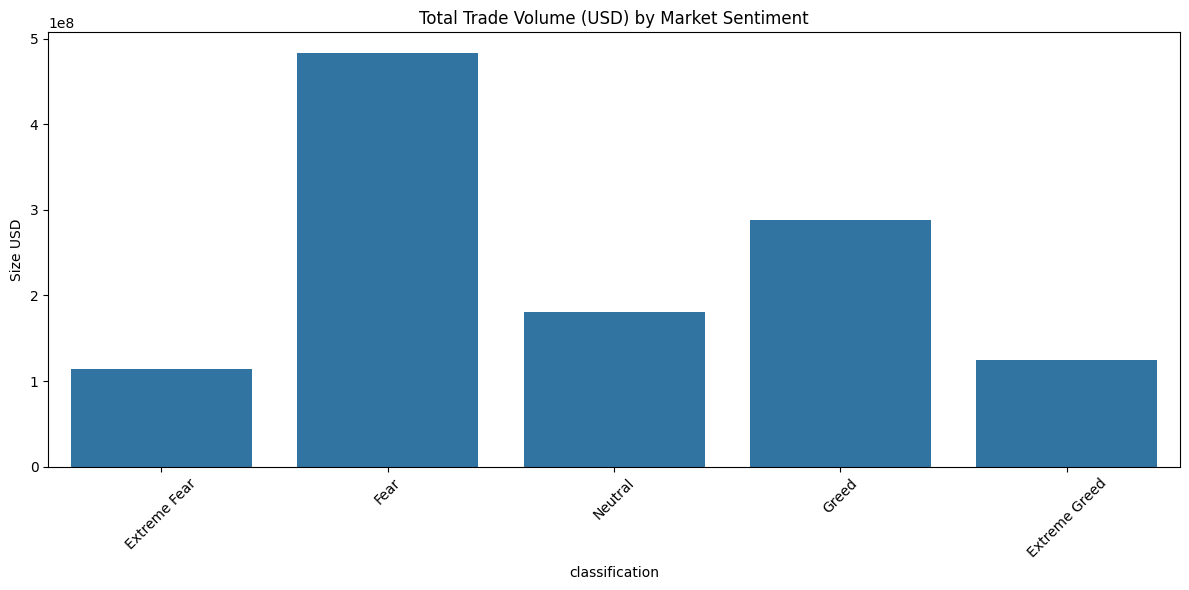

In [56]:
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.barplot(
    x='classification',
    y='Size USD',
    data=merged_data,
    estimator=sum,
    order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'],
    ci=None
)
plt.title('Total Trade Volume (USD) by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

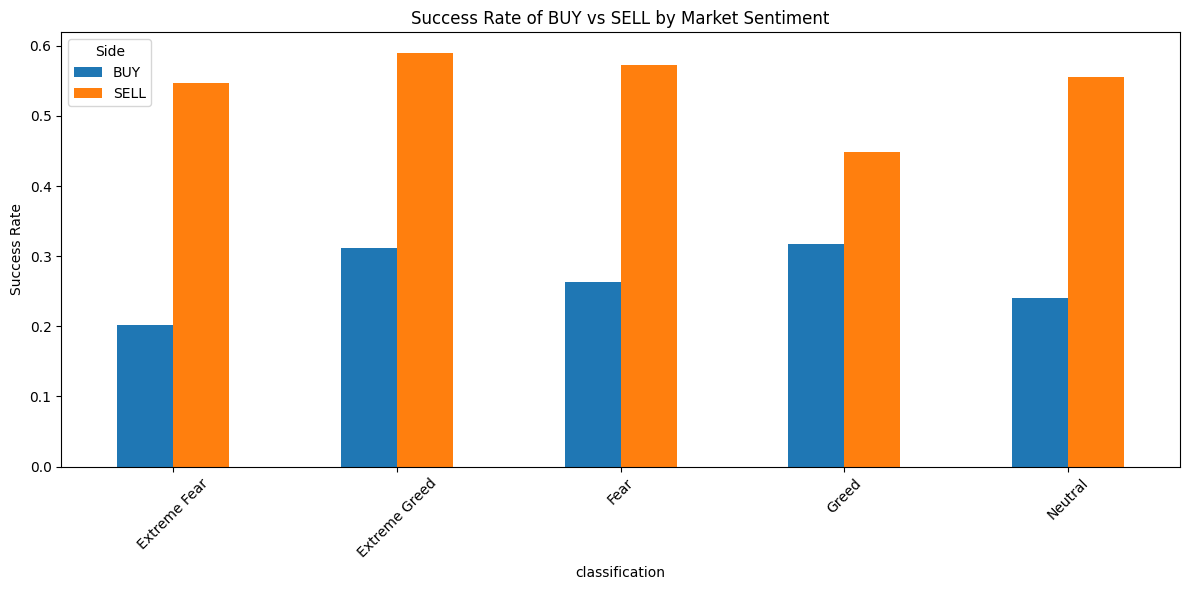

In [57]:
# Create success flag (assuming positive PnL is successful)
merged_data['success'] = merged_data['Closed PnL'] > 0

# Calculate success rates
success_rates = merged_data.groupby(['classification', 'Side'])['success'].mean().unstack()

# Plot
success_rates.plot(kind='bar', figsize=(12, 6))
plt.title('Success Rate of BUY vs SELL by Market Sentiment')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
if 'Leverage' in merged_data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='classification',
        y='Leverage',
        data=merged_data,
        order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    )
    plt.title('Leverage Usage by Market Sentiment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

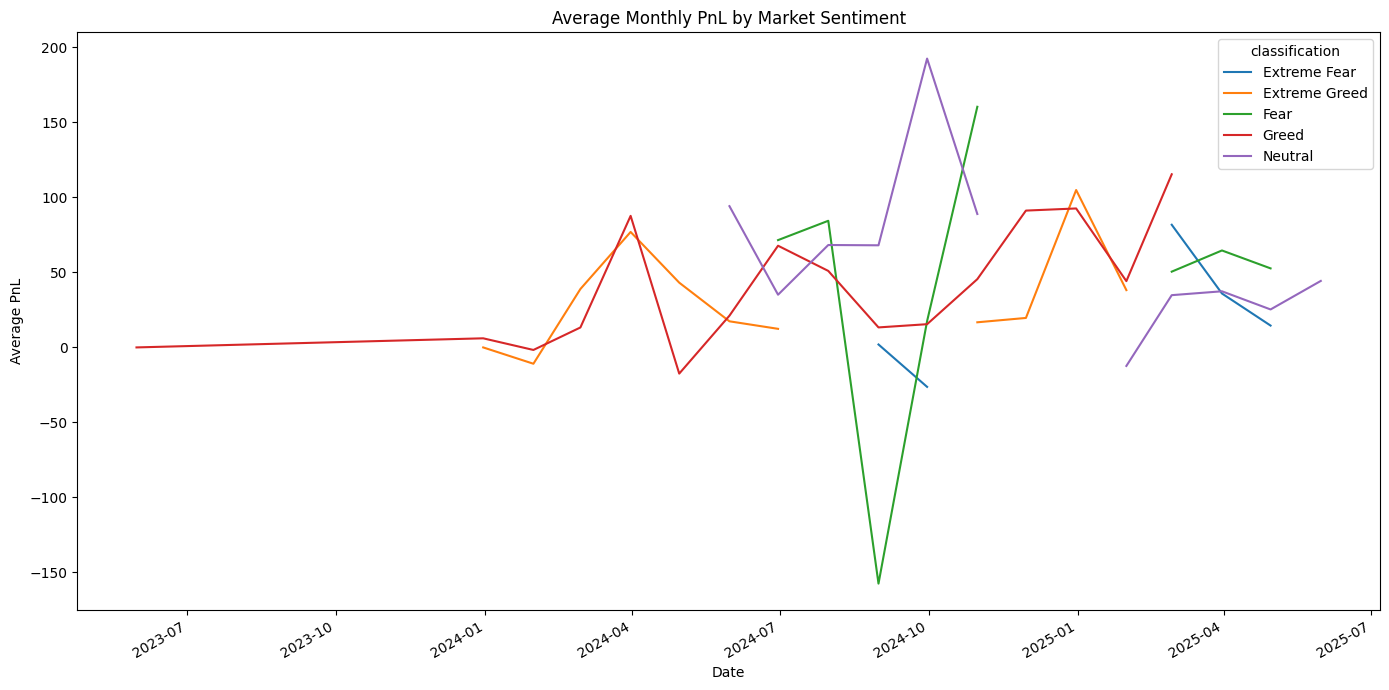

In [59]:
# Resample by month to see trends
monthly_data = merged_data.set_index('trade_date').groupby([pd.Grouper(freq='ME'), 'classification'])['Closed PnL'].mean().unstack()

# Plot
monthly_data.plot(figsize=(14, 7))
plt.title('Average Monthly PnL by Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

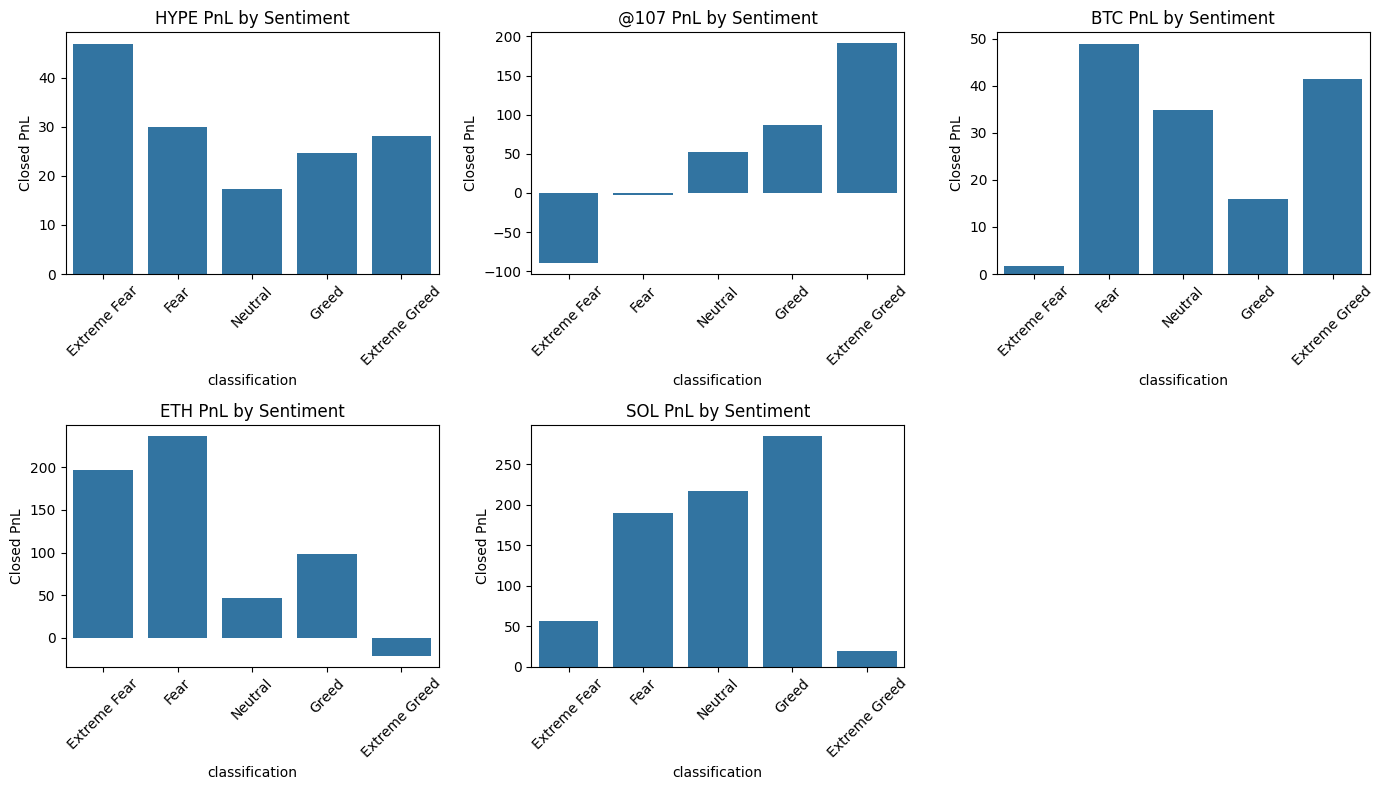

In [60]:
if 'Coin' in merged_data.columns:
    # Top 5 coins by trade volume
    top_coins = merged_data['Coin'].value_counts().head(5).index

    plt.figure(figsize=(14, 8))
    for i, coin in enumerate(top_coins, 1):
        plt.subplot(2, 3, i)
        coin_data = merged_data[merged_data['Coin'] == coin]
        sns.barplot(
            x='classification',
            y='Closed PnL',
            data=coin_data,
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'],
            errorbar=None  
        )
        plt.title(f'{coin} PnL by Sentiment')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


              precision    recall  f1-score   support

       False       0.67      0.68      0.67     37218
        True       0.53      0.52      0.52     26150

    accuracy                           0.61     63368
   macro avg       0.60      0.60      0.60     63368
weighted avg       0.61      0.61      0.61     63368



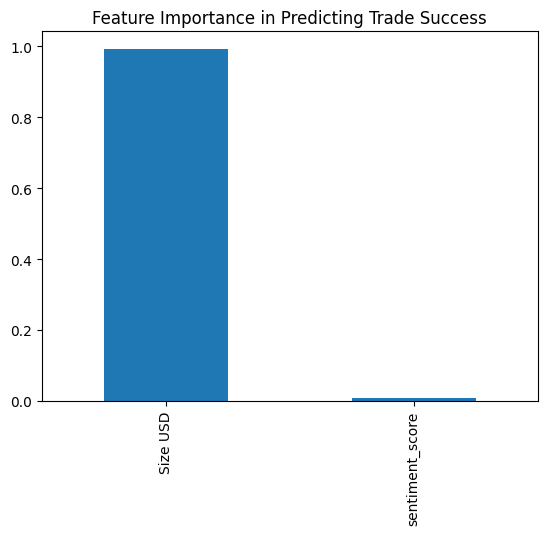

In [ ]:
# Machine Learning Model to Predict Trade Success Based on Sentiment
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and target
ml_data = merged_data.copy()
ml_data['sentiment_score'] = ml_data['classification'].map({
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
})

features = ['sentiment_score', 'Size USD']
if 'Leverage' in ml_data.columns:
    features.append('Leverage')

X = ml_data[features].fillna(0)
y = ml_data['success']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='bar')
plt.title('Feature Importance in Predicting Trade Success')
plt.show()